<h1><b>Q-Learning</b></h1>
<p align="justify">Στην συγκεκριμένη άσκηση θα μελετήσετε το στοχαστικό αλγόριθμο <i><a href="https://en.wikipedia.org/wiki/Q-learning">Q-Learning</a></i>, χρησιμοποιώντας το έτοιμο πρόγραμμα που σας δίνεται. Με το συγκεκριμένο πρόγραμμα μπορείτε να βρείτε τη μικρότερη διαδρομή μεταξύ δύο σημείων όπως φαίνεται στο παρακάτω σχήμα (στο δοθέν παράδειγμα η αρχή είναι το σημείο 0 και ο τελικός προορισμός το σημείο 7):</p>
<img src="https://raw.githubusercontent.com/nkostopoulos/StochasticsLabPublic/master/2020/lab5/ex5a.PNG"></img>
<p align="justify">Με βάση το τον κώδικα που σας έχει δοθεί, καλείστε να απαντήσετε στα παρακάτω ερωτήματα:</p>


__Ερώτηση__

Να περιγράψετε σύντομα τον αλγόριθμο <i>Q-Learning</i>. Σε ποια προβλήματα θεωρείτε ότι ταιριάζει ως τρόπος εκμάθησης η <i><a href="https://en.wikipedia.org/wiki/Reinforcement_learning">Ενισχυτική Μάθηση (Reinforcement Learning)</a></i>; Ποια είναι η βασική διαφορά του αλγορίθμου <i>Q-Learning</i> από τους αλγορίθμους <i>Policy Iteration</i> και <i>Value Iteration</i>;

__Απάντηση__

Στον αλγόριθμο Q learning ο agent δεν έχει γνώση του περιβάλλοντος που βρίσκεται. Μαθαίνει ουσιαστικά μέσα από την εμπειρία. Γενικά, ο agent εξερευνάει τις καταστάσεις και πάει από state σε state μέχρις ότου να βρει την τελική κατάσταση που τον ενδιαφέρει (GOAL STATE). Κάθε τέτοια εξερεύνηση ονομάζεται episode. Κάθε φορά που ο agent φτάνει στο goal state ουσιαστικά πάει και στο επόμενο episode. Kάθε episode είναι ένα training session. Σε κάθε εκπαιδευτική διαδικασία ο agent εξερευνάει το περιβάλλον(πίνακας R) ,λαμβάνει τα rewards και ο σκοπός της εκπαίδευσης ουσιαστικά είναι να γίνει πιο έξυπνος ο "εγκέφαλος" του που χαρακτηρίζεται από τον πίνακα Q.

Παρουσίαση κάποιων δομικών παραμέτρων του αλγορίθμου:

__Πίνακας Q:__ <img src="qmatrix.png" />

__Πίνακας R:__ <img src="Rmatrix.png" />

__Συνοπτικά ο αλγόριθμος q - learning είναι ο ακόλουθος:__

1. Θέσε την παράμετρο gamma(learning parameter 0 to 1, όσο πιο μικρή τιμή τόσο πιο πολύ λαμβάνει υπόψιν τα imediate rewards) και τον πίνακα R που περιέχει τις καταστάσεις με τα instant rewards.

2. Αρχικοποίηση του πίνακα Q με 0. 


3. Για κάθε episode:

    Διάλεξε μια τυχαία αρχική κατάσταση.

    Μέχρις ότου να βρεθεί ο agent στην GOAL STATE επανάλαβε:

        Διάλεξε μια από όλες τις πιθανές κινήσεις για την παρούσα κατάσταση(current state) που βρίσκεσαι.
        
        Διάλεξε τυχαία ένα πιθανό action, και από το current_state πήγαινε στο next_state.
        
        Πάρε το maximum Q value για αυτήν την επόμενη κατάσταση βασισμένο σε όλες τις πιθανές κινήσεις
        
        Yπολόγισε το: Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
        
        Θέσε την επόμενη κατάσταση σαν current state
        
    Τέλος μέχρις_ότου

   Τέλος Για

Eπομένως μετά το πέρας του αλγορίθμου θα έχουμε ένα Q πίνακα εκπαιδευμένο, οποίος θα μπορεί να μας επιφέρει ένα optimal policy, καθώς θα επιλεγούν τα στοιχεία του πίνακα που έχουν άθροισμα το max reward. Ο τρόπος, που λειτουργεί ο πίνακας Q μπορεί να περιγραφεί ως εξής:

    Υποθέτοντας πως ξεκινάμε από την κατάσταση 2 ο agent με βάση τον πίνακα Q, θα βρισκόμαστε στη 2η γραμμή και θα διαλέξουμε το action το οποίο μας πάει στην κατάσταση με το μεγαλύτερο reward. Ας το δούμε με ένα παράδειγμα. Έστω οι συνδέσεις που μας δίνει το πρόγραμμα μας:
    
        points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
        
    και έστω Q o εκπαιδευμένος πίνακας. 
   <img src="trainedq.png" /> 
   
       To βέλτιστο path είναι το [0, 1, 2, 7], γιατί στην 0-γραμμή τη μεγαλύτερη τιμή την έχει για το action που θα πάει τον agent στη κατάσταση 1. Έπειτα η 1-γραμμή έχει τη μεγαλύτερη τιμή για το action που την πάει στην κατάσταση 2, και η 2-γραμμή έχει την μεγαλύτερη τιμή για την πράξη που την πάει στην τελική κατάσταση 7.


__προβλήματα που ταιριάζουν κυρίως στο reinforcement learning:__

    Στους αλγορίθμους RL ανήκει και ο Q-learning και οι αλγόριμοι policy & value iteration. Αυτοί οι αλγόριθμοι γενικά, λειτουργούν με την έννοια του reward-punishment επιβραβέυοντας τις καλές κινήσεις και τιμωρώντας τις κακές. Το μοντέλο σε ενα RL σύστημα βασίζεται στην εκμάθηση μέσω εμπειρίας.
    Προβλήματα που ταιριάζουν σε τέτοιου είδους προβλήματα είναι αυτά που έχουν ως στόχο τη μεγιστοποίηση μιας συνάρτησης κόστους. Όπως για παράδειγμα στο δικό μας πρόβλημα, είδαμε βέλτιστη διαδρομή με μικρότερο κόστος. Δηλαδή να συνδεθούμε από ένα κόμβο με έναν άλλο. Ή το παράδειγμα frozenlake είναι ένα πρόβλημα που ταιριάζει σε αλγορίθμους RL.
    
__Βασική διαφορά Q-learning με Policy iteration και Value iteration:__

    Στον αλγόριθμο Q-learning, ο agent δεν γνωρίζει τις πιθανότητες μετάβασης κατάστασης.Δεν υπάρχει ένα πιθανοτικό μοντέλο που να ορίζει αυτές τις πιθανότητες μετάβασης.
    Oι αλγόριθμοι policy και value iteration γνωρίζουν τις πιθανότητες μετάβασης και έχουν ένα πιο περιορισμένο χώρο εξερεύνησης. Για αυτό και ο q-learning είναι πιο ακριβός υπολογιστικά.



__Ερώτηση__

Σχεδιάστε τη <i>μήτρα διασύνδεσης των κόμβων</i> (με -1 θα συμβολίζετε τις περιπτώσεις όπου δεν υπάρχει διασύνδεση μεταξύ των κόμβων, με 0 την περίπτωση όπου υπάρχει απλή διασύνδεση μεταξύ των κόμβων και με 100 όταν ένας κόμβος διασυνδέεται με τον τερματικό κόμβο).

__Απάντηση__

<img src="myR.png" />



__Ερώτηση__

Εκτελέστε το πρόγραμμα που σας έχει δοθεί και στη συνέχεια αλλάξτε τον τρόπο που συνδέονται οι κόμβοι. Τι παρατηρείτε ως προς τα αποτελέσματα;

__Απάντηση__

    Παρατηρούμε πως ο αλγόριθμος παρόλο που αλλάξαμε τις καταστάσεις στους κόμβους έμαθε πως να πάει στην         κατάσταση 7 από την 0 με άλλον τρόπο.
    
    Για το συγκεκριμένο  points_list = [(0,3), (1,6), (5,7), (5,4), (1,2), (2,3), (2,7)]
    
    Πήραμε path [0, 3, 2, 7]
    
    Eνώ με το αρχικό του προγράμματος είχαμε το path [0,1,2,7]
    

__Ερώτηση__

Έστω ότι οι κόμβοι έχουν και πρόσθετη πληροφορία (εκτός από τον τρόπο διασύνδεσης τους) που ο agent θα μπορεί να την αξιοποιήσει για να φτάσει στον προορισμό του. Τι θα συνέβαινε ως προς τα αποτελέσματα;

__Απάντηση__

Αν είχαμε κάποιες παραπάνω πληροφορίες , θα ήταν πιο εύκολο για τον agent να φτάσει στον προορισμό του και θα το κατάφερνε σε λιγότερο χρόνο, άρα και σε λιγότερα βήματα.

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
max_value 0.0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 180.0
Score: 100.0
max_value 0.

Score: 958.4931858007308
max_value 315.3883139815727
Score: 959.8420881421941
max_value 394.23539247696584
Score: 959.8420881421941
max_value 252.31065118525817
Score: 959.8420881421941
max_value 315.3883139815727
Score: 959.8420881421941
max_value 492.79424059620726
Score: 960.2076443322926
max_value 315.3883139815727
Score: 960.4416002939556
max_value 252.31065118525817
Score: 960.4416002939556
max_value 394.23539247696584
Score: 960.4416002939556
max_value 201.11065118525815
Score: 970.5873646447662
max_value 394.23539247696584
Score: 970.5873646447662
max_value 252.31065118525817
Score: 970.5873646447662
max_value 315.3883139815727
Score: 970.5873646447662
max_value 315.3883139815727
Score: 970.5873646447662
max_value 494.23539247696584
Score: 968.0487997483219
max_value 315.3883139815727
Score: 968.2820735126365
max_value 315.3883139815727
Score: 968.2820735126365
max_value 201.11065118525815
Score: 968.2820735126365
max_value 315.3883139815727
Score: 968.2820735126365
max_value 2

max_value 255.8961540628294
Score: 982.3377446442763
max_value 319.8701925785367
Score: 982.3377446442763
max_value 255.8961540628294
Score: 982.3377446442763
max_value 399.8377407231709
Score: 982.3377446442763
max_value 319.8701925785367
Score: 982.3377446442763
max_value 319.8701925785367
Score: 982.3377446442763
max_value 499.9825775428137
Score: 982.3300581306505
max_value 255.8961540628294
Score: 982.3300581306505
max_value 319.8701925785367
Score: 982.3300581306505
max_value 255.8961540628294
Score: 982.3300581306505
max_value 499.986062034251
Score: 982.3609903776209
max_value 255.8961540628294
Score: 982.3609903776209
max_value 255.8961540628294
Score: 982.3609903776209
max_value 255.8961540628294
Score: 982.3609903776209
max_value 399.98884962740084
Score: 982.3912130009506
max_value 255.8961540628294
Score: 982.3912130009506
max_value 319.8701925785367
Score: 982.3912130009506
max_value 499.986062034251
Score: 982.3912130009506
max_value 319.8701925785367
Score: 982.39121300

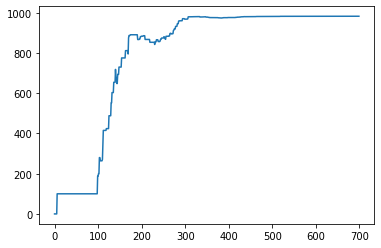

In [6]:
import numpy as np
import pylab as plt
import time

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)] #Most efficient path: [0, 1, 2, 7]
#max_value 399.9942910092293
#Score: 982.7011366075353

#points_list = [(0,3), (1,6), (5,7), (5,4), (1,2), (2,3), (2,7)] ->Most efficient path: [0, 3, 2, 7]
#max_value 319.4007256063824
#Score: 1121.5055992480357

# set the goal
goal = 7

# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

start_time = time.time()

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index
print("--- %s seconds ---" % (time.time() - start_time))
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

#### Q matrix

In [7]:
print(Q/np.max(Q)*100)

[[  0.          63.99971471   0.           0.           0.
    0.           0.           0.        ]
 [ 51.19977177   0.          79.99964339   0.           0.
   51.1995087    0.           0.        ]
 [  0.          63.99971471   0.          63.99971471   0.
    0.           0.          99.99988308]
 [  0.           0.          79.99964339   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.1995087    0.           0.        ]
 [  0.          63.99938587   0.           0.          40.94357614
    0.          40.95960696   0.        ]
 [  0.           0.           0.           0.           0.
   51.1995087    0.           0.        ]
 [  0.           0.          79.99990646   0.           0.
    0.           0.         100.        ]]


(0, 3)
(1, 6)
(5, 7)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
max_value 0.0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 80.0
Score: 180.0
max_value 80.0
Score: 180.0
max_value 80.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 80.0
Score: 260.0
max_value 80.0
Score: 260.0
max_value 80.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 0.0
Score: 260.0
max_value 164.0
Score: 197.5609756097561
max_value 0.0
Score: 197.5609756097561
max_value 0.0
Score: 197.5609756097561
max_value 0.0
Score: 197.5609756097561
max_value 164.0
Score: 197.5609756097561
max_value 0.0
Score: 197.5609756097561
max_value 131.20000000000002
Score: 228.78048780487808
max_

Score: 1076.2404215764354
max_value 281.405529310314
Score: 1076.2404215764354
max_value 475.29953875860105
Score: 1067.2110713607121
max_value 289.1244234482512
Score: 1067.2110713607121
max_value 380.23963100688087
Score: 1071.173646570812
max_value 231.299538758601
Score: 1071.173646570812
max_value 281.405529310314
Score: 1071.173646570812
max_value 304.1917048055047
Score: 1075.9677129725392
max_value 304.1917048055047
Score: 1075.9677129725392
max_value 231.299538758601
Score: 1075.9677129725392
max_value 225.12442344825124
Score: 1075.9677129725392
max_value 361.405529310314
Score: 1075.9677129725392
max_value 289.1244234482512
Score: 1075.9677129725392
max_value 281.405529310314
Score: 1075.9677129725392
max_value 304.1917048055047
Score: 1075.9677129725392
max_value 304.1917048055047
Score: 1075.9677129725392
max_value 361.405529310314
Score: 1077.9977207645984
max_value 361.405529310314
Score: 1077.9977207645984
max_value 289.1244234482512
Score: 1079.6217269982458
max_value 

Score: 1121.5293319544267
max_value 318.6420777826827
Score: 1121.5293319544267
max_value 498.6420777826827
Score: 1120.83386448522
max_value 318.6420777826827
Score: 1120.83386448522
max_value 398.3025972283533
Score: 1120.83386448522
max_value 254.91366222614616
Score: 1120.83386448522
max_value 318.6420777826827
Score: 1120.83386448522
max_value 254.91366222614616
Score: 1120.83386448522
max_value 498.9136622261462
Score: 1120.4312708353796
max_value 398.3025972283533
Score: 1120.4312708353796
max_value 398.3025972283533
Score: 1120.4312708353796
max_value 254.91366222614616
Score: 1120.4312708353796
max_value 398.3025972283533
Score: 1120.4312708353796
max_value 398.3025972283533
Score: 1120.4312708353796
max_value 398.3025972283533
Score: 1120.4312708353796
max_value 254.91366222614616
Score: 1120.4312708353796
max_value 318.6420777826827
Score: 1120.4312708353796
max_value 318.6420777826827
Score: 1120.4312708353796
max_value 254.91366222614616
Score: 1120.4312708353796
max_value

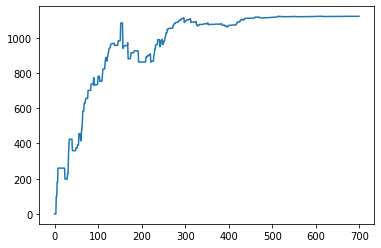

In [3]:
import numpy as np
import pylab as plt
import time

# map cell to cell, add circular cell to goal point
#points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)] #Most efficient path: [0, 1, 2, 7]
#max_value 399.9942910092293
#Score: 982.7011366075353

points_list = [(0,3), (1,6), (5,7), (5,4), (1,2), (2,3), (2,7)] #->Most efficient path: [0, 3, 2, 7]
#max_value 319.4007256063824
#Score: 1121.5055992480357

# set the goal
goal = 7

# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

start_time = time.time()

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index
print("--- %s seconds ---" % (time.time() - start_time))
print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [9]:
import numpy
R = np.array([[-1,0,-1,-1,-1,-1,-1,-1],[0,-1,0,-1,-1,0,-1,-1],
              [-1,0,-1,0,-1,-1,-1,100],[-1,-1,0,-1,-1,-1,-1,-1],
              [-1,-1,-1,-1,-1,0,-1,-1],[-1,0,-1,-1,0,-1,0,-1],
              [-1,-1,-1,-1,-1,0,-1,-1],[-1,-1,0,-1,-1,-1,-1,100]])
import pandas as pd
R_DF = pd.DataFrame({'0': R[:, 0], '1': R[:, 1], '2': R[:, 2],'3': R[:, 3],'4': R[:, 4],'5': R[:, 5],'6': R[:, 6],'7': R[:, 7]})
R_DF

,0,1,2,3,4,5,6,7
0,-1,0,-1,-1,-1,-1,-1,-1
1,0,-1,0,-1,-1,0,-1,-1
2,-1,0,-1,0,-1,-1,-1,100
3,-1,-1,0,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,0,-1,-1
5,-1,0,-1,-1,0,-1,0,-1
6,-1,-1,-1,-1,-1,0,-1,-1
7,-1,-1,0,-1,-1,-1,-1,100


### Πίνακας Q

In [4]:
print(Q)

[[  0.           0.           0.         319.55503605   0.
    0.           0.           0.        ]
 [  0.           0.         399.44379506   0.           0.
    0.         255.64402884   0.        ]
 [  0.         319.55503605   0.         319.55503605   0.
    0.           0.         499.55503605]
 [255.64402884   0.         399.64402884   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  399.64402884   0.           0.        ]
 [  0.           0.           0.           0.         319.44379506
    0.           0.         499.55503605]
 [  0.         319.55503605   0.           0.           0.
    0.           0.           0.        ]
 [  0.           0.         399.44379506   0.           0.
  399.64402884   0.         499.44379506]]
